# 📱 App Store Review Sentiment Analysis
## Clasificación de Sentimientos usando Naive Bayes

Este proyecto tiene como objetivo construir un modelo de clasificación de sentimientos en reseñas de aplicaciones móviles mediante el algoritmo **Naive Bayes**. Esta técnica probabilística resulta especialmente útil en el análisis de texto por su eficiencia en contextos con múltiples atributos y clases bien definidas.

---

### 📦 Datos

Se trabajó con un conjunto de reseñas reales de usuarios de 23 aplicaciones disponibles en la Google Play Store. Cada reseña incluye el texto y una etiqueta de polaridad que indica si la opinión es **neutral** (`0`) o refleja un **sentimiento intenso** positivo o negativo (`1`).

---

### 🎯 Objetivo del Proyecto

Desarrollar un modelo que sea capaz de identificar automáticamente la polaridad del texto de una reseña. Esto permite categorizar los comentarios de los usuarios para facilitar la toma de decisiones basada en la percepción del producto.

Una vez entrenado el modelo, se evaluó su rendimiento con un conjunto de validación y se exploraron mejoras para aumentar su precisión.

---

### 🧪 Metodología

#### 1. Preprocesamiento y Limpieza de Texto

Se realizó una limpieza profunda del texto, eliminando puntuación, símbolos y palabras irrelevantes. Se aplicaron técnicas de vectorización para transformar las reseñas en datos numéricos aptos para el entrenamiento.

#### 2. Entrenamiento del Modelo

Se utilizó **Naive Bayes** con una división de los datos entre entrenamiento y validación. Se analizó el rendimiento con métricas estándar como precisión, recall y matriz de confusión.

#### 3. Optimización

Se exploraron mejoras como **Laplace smoothing** y el uso de variables adicionales como `package_name` (nombre de la app) para enriquecer el modelo.

---

### 📈 Resultados y Conclusiones

El modelo fue capaz de capturar patrones clave en el lenguaje utilizado por los usuarios, permitiendo clasificar correctamente muchas de las reseñas. No obstante, se observaron diferencias de rendimiento entre algunas aplicaciones. Se proponen futuras mejoras como incorporar más contexto o ajustar el balance de clases.

---

### 🧠 Reflexión

Este proyecto demuestra cómo un modelo simple como Naive Bayes puede ser eficaz en tareas de análisis de sentimientos cuando se combina con un buen preprocesamiento y exploración cuidadosa de los datos.

---

<div align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Google_Play_Store_badge_EN.svg/2880px-Google_Play_Store_badge_EN.svg.png" width="600" />
</div>


## <font color='#3d59c6'>  CARGA DE PACKAGES </font>

In [ ]:
options(warn = -1)
library(tidyverse)
library(tm)
library(SnowballC)
library(wordcloud)
library(e1071)
library(caret)

## <font color='#3d59c6'>  CARGA DE DATOS </font>

- Variable dependiente (target) **polarity** (1: Review con un sentimiento muy positivo o muy negativo
0: Review con un sentimiento neutro
- Variables explicativas o predictoras:

    - **review (tratado)***

In [ ]:
# Asignamos a la variable 'temp' el archivo en cuestión

data <- read.csv(file='sentiment_dataset.csv', stringsAsFactors = F)

# La pasamos a factor ya que ya sabemos que la usaremos en Naive Bayes
data$polarity <- factor(data$polarity)




In [ ]:
head(data)

,package_name,review,polarity
,<chr>,<chr>,<fct>
1,com.facebook.katana,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0
2,com.facebook.katana,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0
3,com.facebook.katana,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0
4,com.facebook.katana,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0
5,com.facebook.katana,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0
6,com.facebook.katana,"idk i can't edit my posts? things such as my profile picture, when i edit it, it becomes grey and says that it is no longer available. please fix. i have an htc desire. will rate 5 stars shown fixed đ",0


A simple vista vemos algunos simbolos raros, asi como signos exclamativos e incluso unas letras con acentos.

## <font color='#3d59c6'>  EXPLORACION </font>

In [ ]:
# Proporción de clases
round(prop.table(table(data$polarity    ))*100, digits = 1)


   0    1 
65.5 34.5 

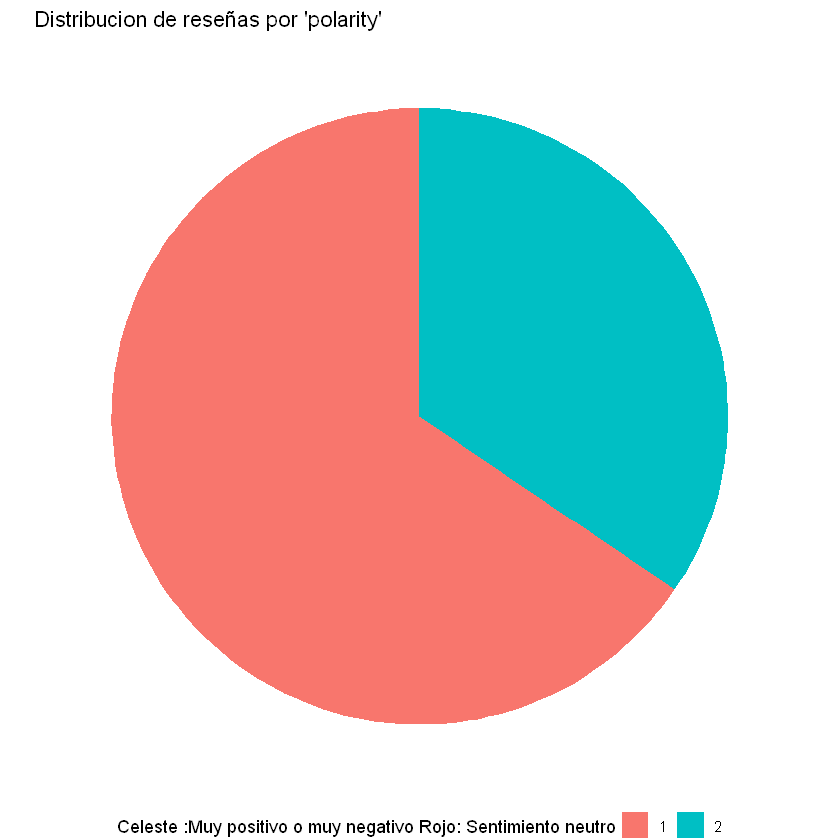

In [ ]:
# Cargar la librería necesaria para graficar
library(ggplot2)

# Crear un resumen de la proporción de cada valor de 'polarity'
summary <- round(prop.table(table(data$polarity)) * 100, digits = 1)

# Convertir el resumen en un data frame
summary_df <- as.data.frame(summary)
summary_df$polarity <- factor(rownames(summary_df))

# Crear el gráfico circular
ggplot(summary_df, aes(x = "", y = Freq, fill = polarity)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  theme_void() +
  theme(legend.position = "bottom") +
  labs(title = "Distribucion de reseñas por 'polarity'",
       fill = "Celeste :Muy positivo o muy negativo Rojo: Sentimiento neutro",
       y = NULL)


Se observa una cantidad mayor de reseñas neutras.

In [ ]:
str(data)

'data.frame':	891 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ ...
 $ polarity    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


## <font color='#3d59c6'>  TRANSFORMACIÓN Y LIMPIEZA DEL DATASET </font>

Con el siguiente código limpiamos y preprocesamos el texto para su posterior análisis, eliminando números, stopwords, signos de puntuación y convirtiendo las palabras a minúsculas. También reducimos las palabras a su raíz para normalizar el texto.

In [ ]:
review_text <- VCorpus(VectorSource(data$review))

review_text_clean_1 <- tm_map(review_text, content_transformer(tolower))
review_text_clean_2 <- tm_map(review_text_clean_1, removeNumbers)
review_text_clean_3 <- tm_map(review_text_clean_2, removeWords, stopwords())

Para evitar el problema de unir palabras, haremos una función que reemplace los signos de puntuación por espacios, en lugar de eliminarlos
review_text_clean_4 <- tm_map(review_text_clean_3, content_transformer(function(x) { gsub("[[:punct:]]+", " ", x) }))

review_text_clean_5 <- tm_map(review_text_clean_4, stemDocument)
review_text_clean_6 <- tm_map(review_text_clean_5, stripWhitespace)

In [ ]:
# Convertir texto a minúsculas y solo caracteres ASCII
review_text_clean_1 <- tm_map(review_text, content_transformer(function(x) { tolower(iconv(x, to = "ASCII", sub = " ")) }))

# Eliminar números
review_text_clean_2 <- tm_map(review_text_clean_1, removeNumbers)

# Eliminar palabras comunes (stopwords)
review_text_clean_3 <- tm_map(review_text_clean_2, removeWords, stopwords())

# Reemplazar signos de puntuación con espacios
review_text_clean_4 <- tm_map(review_text_clean_3, content_transformer(function(x) { gsub("[[:punct:]]+", " ", x) }))

# Derivación de palabras
review_text_clean_5 <- tm_map(review_text_clean_4, stemDocument)

# Eliminar espacios en blanco adicionales
review_text_clean_6 <- tm_map(review_text_clean_5, stripWhitespace)


In [ ]:
# Imprimir el primer documento después de la limpieza
cat(as.character(review_text_clean_6[[1]]))


privaci least put option appear offlin mean peopl like big pressur seen onlin like need respons everi messag els call seenzon wanna facebook read newsfe just wanna respons messag want pls reconsid review tri turn chat still can see onlin

In [ ]:
review_dtm <- DocumentTermMatrix(review_text_clean_6)

## <font color='#3d59c6'>  SEPARACIÓN TRAIN & TEST </font>

In [ ]:

# División estratificada del conjunto de datos
set.seed(123)  # Para reproducibilidad
index <- createDataPartition(data$polarity, p = 0.8, list = FALSE)

# Crear conjuntos de entrenamiento y prueba
train_data <- data[index, ]
test_data <- data[-index, ]

# extraer las características y etiquetas de cada conjunto
review_dtm_train <- review_dtm[index, ]
review_dtm_test <- review_dtm[-index, ]

review_train_labels <- train_data$polarity
review_test_labels <- test_data$polarity

# Verificar las proporciones de las clases en cada conjunto
print(prop.table(table(review_train_labels)))
print(prop.table(table(review_test_labels)))


review_train_labels
        0         1 
0.6554622 0.3445378 
review_test_labels
        0         1 
0.6553672 0.3446328 


In [ ]:
str(train_data)
str(test_data)

'data.frame':	714 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ " forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo "| __truncated__ " idk i can't edit my posts? things such as my profile picture, when i edit it, it becomes grey and says that it"| __truncated__ ...
 $ polarity    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	177 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " privacy at least put some option appear offline. i mean f

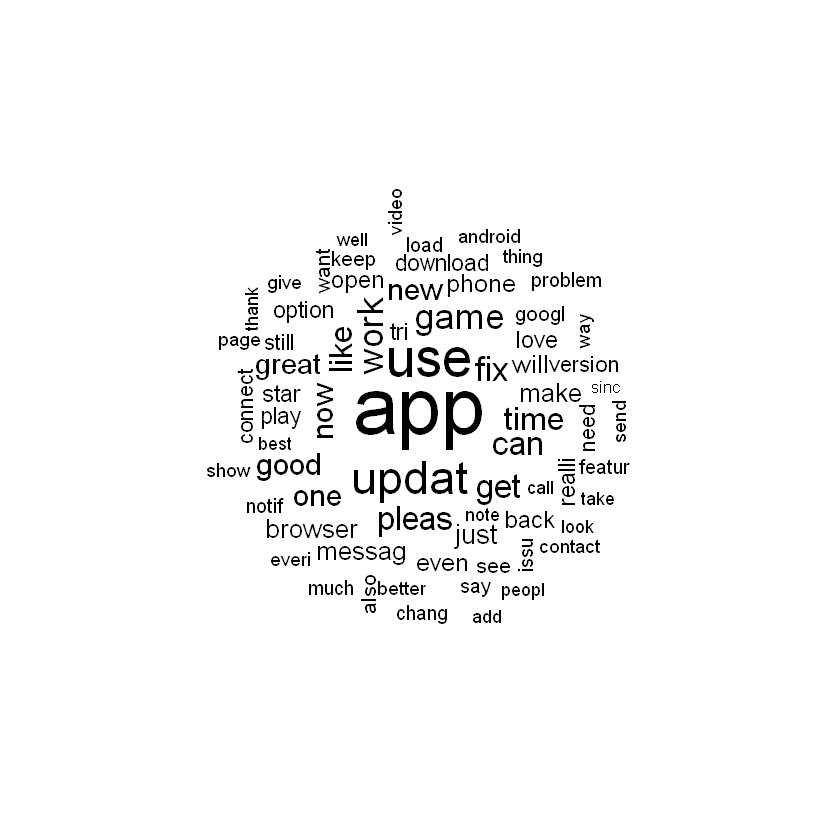

In [ ]:
wordcloud(review_text_clean_6, min.freq = 50, random.order = FALSE)

In [ ]:
posneg <- filter(data, data$polarity == "1")
neutro <- filter(data, data$polarity == "0")

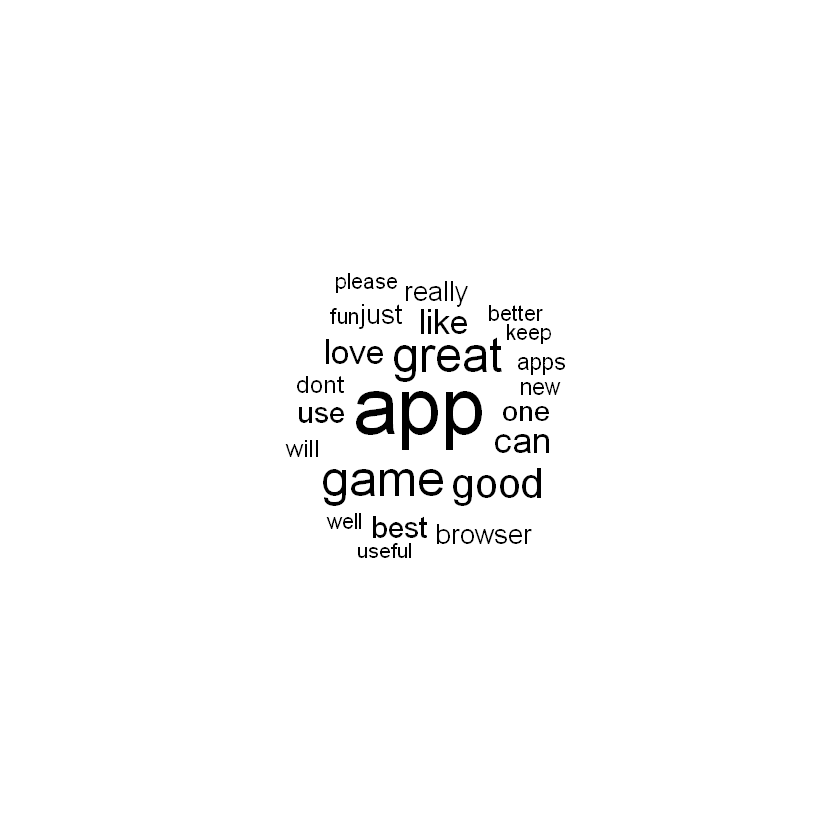

In [ ]:
wordcloud(posneg$review, min.freq = 25, random.order = FALSE)

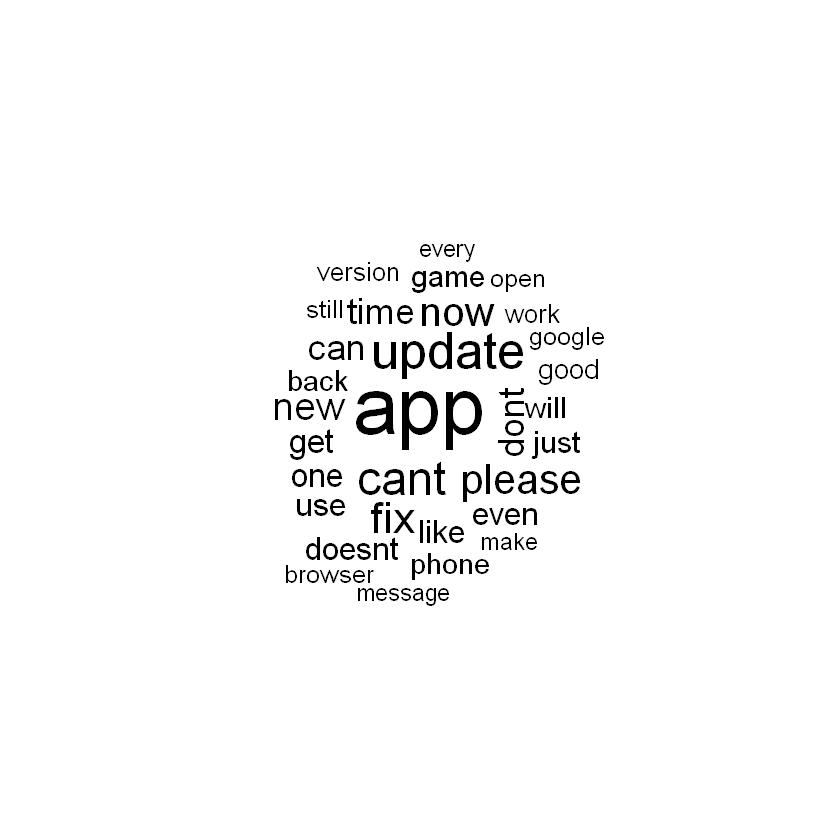

In [ ]:
wordcloud(neutro$review, min.freq = 50, random.order = FALSE)

In [ ]:
str(review_dtm_test)

List of 6
 $ i       : int [1:3362] 1 1 1 1 1 1 1 1 1 1 ...
 $ j       : int [1:3362] 122 240 336 343 384 714 763 808 1217 1276 ...
 $ v       : num [1:3362] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 177
 $ ncol    : int 2629
 $ dimnames:List of 2
  ..$ Docs : chr [1:177] "1" "2" "9" "15" ...
  ..$ Terms: chr [1:2629] "aafnaii" "aakhirat" "aalikati" "aap" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [ ]:
as.matrix(review_dtm_test)

,aafnaii,aakhirat,aalikati,aap,aapsssssss,aaru,abil,abk,abl,absolut,⋯,yes,yet,youtub,yrs,yteczn,yup,zenfon,zero,zespol,zoom
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
44,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Establecemos las frecuencias de cada término sumando las columnas
termFreq = colSums(as.matrix(review_dtm_test))
tail(termFreq)

yteczn    yup zenfon   zero zespol   zoom 
     0      0      0      0      0      1

In [ ]:
#Creamos el nuevo data set
tabla_frec = data.frame(term = names(termFreq), freq = termFreq)
tail(tabla_frec)

,term,freq
,<chr>,<dbl>
yteczn,yteczn,0
yup,yup,0
zenfon,zenfon,0
zero,zero,0
zespol,zespol,0
zoom,zoom,1


In [ ]:
#Ordenamos por frecuencias descendientes
tabla_frec = tabla_frec[order(-tabla_frec[,2]),]
head(tabla_frec)

,term,freq
,<chr>,<dbl>
app,app,105
use,use,60
updat,updat,47
can,can,39
game,game,39
work,work,39


In [ ]:
#Recortamos el data set con las palabras con una frecuencia superior a 7
review_freq_words <- findFreqTerms(review_dtm_train, 7)
review_freq_words

[1] "abil"       "abl"        "access"     "account"    "actual"    
  [6] "add"        "addict"     "advertis"   "ago"        "album"     
 [11] "allow"      "almost"     "alreadi"    "also"       "alway"     
 [16] "amaz"       "android"    "angri"      "annoy"      "anoth"     
 [21] "anymor"     "anyth"      "app"        "appear"     "applic"    
 [26] "around"     "ask"        "attack"     "automat"    "avail"     
 [31] "away"       "awesom"     "back"       "background" "backup"    
 [36] "bad"        "bar"        "base"       "basic"      "becom"     
 [41] "best"       "better"     "big"        "bird"       "bit"       
 [46] "block"      "bookmark"   "booster"    "box"        "brilliant" 
 [51] "brows"      "browser"    "bug"        "busi"       "button"    
 [56] "buy"        "call"       "can"        "candi"      "cant"      
 [61] "card"       "caus"       "certain"    "challeng"   "chang"     
 [66] "chat"       "check"      "choos"      "chrome"     "clear"     
 [71] "click"      "close"      "code"       "color"      "come"      
 [76] "comment"    "compani"    "complet"    "comput"     "connect"   
 [81] "constant"   "contact"    "continu"    "convers"    "cool"      
 [86] "crash"      "creat"      "crush"      "current"    "custom"    
 [91] "data"       "day"        "default"    "delet"      "design"    
 [96] "desktop"    "develop"    "devic"      "differ"     "direct"    
[101] "disappear"  "disappoint" "done"       "dont"       "download"  
[106] "drop"       "dropbox"    "easi"       "edit"       "either"    
[111] "emoji"      "enabl"      "end"        "english"    "enjoy"     
[116] "enough"     "error"      "especi"     "etc"        "even"      
[121] "ever"       "everi"      "evernot"    "everyon"    "everyth"   
[126] "everytim"   "excel"      "expect"     "experi"     "facebook"  
[131] "fail"       "far"        "fast"       "favorit"    "featur"    
[136] "feed"       "feel"       "file"       "find"       "fine"      
[141] "firefox"    "first"      "five"       "fix"        "folder"    
[146] "follow"     "font"       "forc"       "found"      "free"      
[151] "freez"      "frequent"   "friend"     "frozen"     "frustrat"  
[156] "full"       "fun"        "function"   "galaxi"     "game"      
[161] "gem"        "get"        "gif"        "give"       "glitch"    
[166] "goe"        "gold"       "gone"       "good"       "googl"     
[171] "got"        "great"      "group"      "guy"        "half"      
[176] "hamro"      "hang"       "hangout"    "happen"     "happi"     
[181] "hard"       "hate"       "head"       "help"       "high"      
[186] "histori"    "home"       "hope"       "horribl"    "hour"      
[191] "howev"      "idea"       "imag"       "import"     "improv"    
[196] "includ"     "instal"     "instead"    "interfac"   "intern"    
[201] "internet"   "issu"       "job"        "just"       "keep"      
[206] "key"        "keyboard"   "kick"       "kill"       "kind"      
[211] "know"       "lack"       "lag"        "languag"    "last"      
[216] "later"      "latest"     "layout"     "left"       "less"      
[221] "let"        "level"      "life"       "like"       "link"      
[226] "linkedin"   "list"       "littl"      "live"       "load"      
[231] "lock"       "log"        "login"      "long"       "longer"    
[236] "look"       "loot"       "lose"       "lost"       "lot"       
[241] "love"       "made"       "make"       "manag"      "mani"      
[246] "map"        "may"        "mayb"       "mean"       "memori"    
[251] "menu"       "messag"     "messeng"    "mini"       "minut"     
[256] "miss"       "mobil"      "mode"       "moment"     "money"     
[261] "month"      "move"       "msgs"       "much"       "multipl"   
[266] "must"       "name"       "near"       "need"       "nepali"    
[271] "network"    "never"      "new"        "news"       "next"      
[276] "nice"       "note"       "notebook"   "noth"       "notic"     
[281] "notif"      "notifi

In [ ]:
review_dtm_freq_test <- review_dtm_test[, review_freq_words]
review_dtm_freq_train <- review_dtm_train[, review_freq_words]

## <font color='#3d59c6'>  CLASIFICADOR NAIVE BAYES </font>

Naive Bayes funciona con factores es por eso que sabiendo esto al inicio del dataset realizamos justo despues de la carga la transformacion a Factor de polarity

In [ ]:
convert_counts <- function(x){
  x <- ifelse(x > 0, "yes", "no")
}

review_dtm_freq_test <- apply(review_dtm_freq_test, MARGIN = 2, convert_counts)
review_dtm_freq_train <- apply(review_dtm_freq_train, MARGIN = 2, convert_counts)

In [ ]:
review_classifier <- naiveBayes(review_dtm_freq_train, review_train_labels)

In [ ]:
prediccion_test <- predict(review_classifier, review_dtm_freq_test)
confusionMatrix(data = prediccion_test, reference = review_test_labels)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 97 13
         1 19 48
                                          
               Accuracy : 0.8192          
                 95% CI : (0.7545, 0.8729)
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 1.074e-06       
                                          
                  Kappa : 0.6089          
                                          
 Mcnemar's Test P-Value : 0.3768          
                                          
            Sensitivity : 0.8362          
            Specificity : 0.7869          
         Pos Pred Value : 0.8818          
         Neg Pred Value : 0.7164          
             Prevalence : 0.6554          
         Detection Rate : 0.5480          
   Detection Prevalence : 0.6215          
      Balanced Accuracy : 0.8115          
                                          
       'Positive' Class : 0               
                                    

En general, estos resultados sugieren que el modelo tiene un rendimiento decente, pero podría haber margen para mejorar, especialmente en términos de reducir los falsos positivos y negativos.

## Resumen

El modelo Naive Bayes fue evaluado utilizando una matriz de confusión y estadísticas de rendimiento. A continuación se presentan los resultados:

## Estadísticas de Rendimiento

- **Accuracy**: 81.92%
- **Sensitivity**: 83.62%
- **Specificity**: 78.69%
- **Positive Predictive Value (PPV)**: 88.18%
- **Negative Predictive Value (NPV)**: 71.64%
- **Kappa**: 60.89%

## Conclusiones

El modelo Naive Bayes tiene un rendimiento decente, con una precisión del 81.92%. Sin embargo, se observa una proporción significativa de falsos positivos y falsos negativos.
vos y falsos negativos.


In [ ]:
# Visualizamos las instancias que han sido filtradas erróneamente
test_data[(prediccion_test != test_data$polarity) # Seleccionamos las instancias con error en la predicción
          & (test_data$polarity == 1),] # Seleccionamos las instancias con etiqueta de review muy positiva o muy negativa

,package_name,review,polarity
,<chr>,<chr>,<fct>
74,com.twitter.android,love it you are able to see celebrity tweets and get info you didn't know... i love it,1
114,com.linkedin.android,groups??? ** edit: i changed my rating from one to three stars due to linkedin's response to my review. glad groups is still in the app but i dont iike that it is not as straightforward to access them as before.,1
129,com.king.candycrushsaga,"umm.... while this game has gotten kinda old, and i've basically replaced it with the soda saga game, i still like playing this but for some reason, for i don't know how many days now, every time i go to open this game it'll load a little and then crash closed. fix please!!!!!!!!",1
172,com.imangi.templerun2,awsome but i â¤â¤â¤â¤â¤â¤â¤â¤â¤â¤ this game but i don't like the frozen bit my sister has had eye site and she can see the normal one and she can't see the frozen ones so she keeps dieing luckerly we can change back to the normal one but the frozen one takes longer to load so when the frozen whone is out the window i will rate 5 stars but the rest is awesome,1
233,com.supercell.clashofclans,"no longer a casual game the current version of the game makes it too hard to play casually anymore. expect to spend 4-6 hours a day, just to stay afloat.",1
350,com.viber.voip,"viber about the voice messages and chatting, viber is the best app in the market. about the calling services - even messenger performs better. the app isn't optimised for wi-fi usage. about the newest version (until 23.12.2015) there is a new option introduced, which allows you to see which of your friends have seen your message in a group chat. well, it is not working and this makes me a little bit mad - finally the function was introduced in viber and still not working properly.",1
351,com.viber.voip,viber s.a.r.l. this app helps me to stay in contact while also having video options and picture options. really nice app and pretty stable running. just a few video and audio issues as well as video and call drops which can be annoying. sometimes the app is unstable but is mostly attributed to network issues rather than the app itself. i recommend this app.,1
447,com.whatsapp,"add : search people if you don't have the persons number , but they have whatsapp you should be able to search their name and then , add them or something . then it would be 5 stars ...",1
483,com.Slack,works fine for the most part. not sure why it decides to sometimes notify me and sometimes not. i guess it has something to do with inactivity on other logged in devices (i'm usually logged in 24/7 on 2 computers and a phone).,1


In [ ]:
# Visualizamos las instancias que han sido filtradas erróneamente
test_data[(prediccion_test != test_data$polarity) # Seleccionamos las instancias con error en la predicción
          & (test_data$polarity == 0),] # Seleccionamos las instancias con etiqueta neutra

,package_name,review,polarity
,<chr>,<chr>,<fct>
80,com.linkedin.android,the new app looks great and is very easy to use. however it is missing important features such as endorsing connections or writing recommendations. furthermore i hate the fact that job search is now in a separate app. why do i have to download 2 apps?,0
102,com.linkedin.android,"not good although most if the update is ok, you can not inbox people for free anymore.... why should i hand over my bank details for a free trial??? complete rip off",0
160,com.imangi.templerun2,book and their use as a great christmas navarro was gonna get a lot of different names for christmas is a screamer and i can't remember if my sis and baking and making everything so perfect for me to believe in things and i'll return to go over in a few minutes ago and i have a great day at home soon and their little room in the kids to school with your questions,0
175,com.imangi.templerun2,the new theme is not compatible with my device :( (samsung galaxy j1) make it compatible please. i really love this game.,0
199,com.imangi.templerun2,temple run 2 frozen shadows i love this game so much i love being in the ice but only one thing that i hate about it is that the monster goes infront of u when your running but as you go further into the game it gets harder but able to pass the monster,0
295,com.tencent.mm,i met my life here my girlfriend heads off the app. thank you wechat & the entire team .,0
297,com.tencent.mm,"awesome, but less awesome than before this is a really great communications app, better than any other i've found. but sadly with the last update they took a cool feature away. please bring back the walkie talkie. i know it was silly but you've no idea how much we used it. it's one of those features that just makes it fun to talk again.",0
417,com.facebook.orca,not good i had for a while but is not working keeps messing up my face book must have a big because i deleted and my face book works,0
467,com.whatsapp,"no stickers!!!! why is there no stickers?it is not fun. you should make arrangement of stickers.nor,i will uninstall this app.",0


## <font color='#3d59c6'>  MEJORA DEL MODELO - Laplace Smoothing </font>

In [ ]:
# Hacemos una iteración para nuestro modelo en base a un factor i, siendo i el factor alpha en el laplace smoothing
for (i in (1:10))
{
    print(paste0("Laplace factor of ", as.character((i-1)/4)))
    review_classifier2 = naiveBayes(review_dtm_freq_train,
                                 train_data$polarity,
                                 laplace = (i-1)/4)

    review_test.predicted2 = predict(review_classifier2,
                                  review_dtm_freq_test)

    print(confusionMatrix(review_test.predicted2, test_data$polarity))
}

[1] "Laplace factor of 0"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 97 13
         1 19 48
                                          
               Accuracy : 0.8192          
                 95% CI : (0.7545, 0.8729)
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 1.074e-06       
                                          
                  Kappa : 0.6089          
                                          
 Mcnemar's Test P-Value : 0.3768          
                                          
            Sensitivity : 0.8362          
            Specificity : 0.7869          
         Pos Pred Value : 0.8818          
         Neg Pred Value : 0.7164          
             Prevalence : 0.6554          
         Detection Rate : 0.5480          
   Detection Prevalence : 0.6215          
      Balanced Accuracy : 0.8115          
                                          
       'Positive' Class : 0               
          

## <font color='#3d59c6'>  CONCLUSIONES GENERALES </font>


### Limpieza de Instancias:
Se llevó a cabo una limpieza efectiva del texto de las instancias, utilizando técnicas como la conversión a minúsculas, eliminación de números, palabras comunes y signos de puntuación, así como la derivación de palabras y eliminación de espacios en blanco adicionales. Esto garantiza que el texto esté en un formato adecuado para su procesamiento posterior, también encontramos algunos simbolos raros por lo que limitamos la limpieza ASCII.

### Creación de Modelo Clasificador de Naive Bayes:
Se construyó un modelo clasificador de Naive Bayes utilizando el dataset de reseñas de aplicaciones. Se dividió el dataset en conjuntos de entrenamiento y prueba para validar el rendimiento del modelo. La métrica de precisión se utilizó como medida de optimización del modelo.

### Optimización del Modelo:
Se exploró la optimización del modelo mediante técnicas como Laplace smoothing. Se observó que ajustar el factor de suavizado Laplace no tuvo un impacto significativo en el rendimiento del modelo, con una precisión óptima obtenida en un factor de suavizado de 0. (La misma que en Naive Bayes)

### Conclusiones y Vías Abiertas:
- El modelo Naive Bayes demostró ser capaz de clasificar las reseñas de aplicaciones en sentimientos positivos/negativos o neutros con una precisión razonable.
- Sin embargo, se observaron áreas de mejora, especialmente en la identificación de reseñas neutras y en la inclusión de otras características que podrían mejorar la predicción, como la longitud de la reseña o la frecuencia de palabras clave.
- Se recomienda una investigación adicional para explorar otras técnicas de procesamiento de texto y ajuste de hiperparámetros que puedan mejorar aún más el rendimiento del modelo.

